### Ensure correctness of stratification code

Created: Tue, Sep 24, 2024

Description: Max land cover stratfication is leading to a performance drop in our model. Here, I ensure the correctness of the stratification code as outlined below.

In [130]:
from hydroDL import kPath # package by Kuai Fang, kPath contains req paths

import matplotlib.pyplot as plt
from collections import defaultdict
import pandas as pd
import json
import os

In [131]:
split_version = 'dataset'
df = pd.read_csv('../../data/site_land_cover_info.csv')

In [132]:
splits_path = os.path.join(kPath.dirVeg, 'model', 'attention', split_version, 'subset.json')
with open(splits_path) as f:
    splits_dict = json.load(f)

In [133]:
data = {
    'fold' : range(5),
    '# train examples' : [len(splits_dict[f'trainInd_k{fold}5']) for fold in range(5)],
    '# test examples' : [len(splits_dict[f'testInd_k{fold}5']) for fold in range(5)],
    '# train sites' : [len(splits_dict[f'trainSite_k{fold}5']) for fold in range(5)],
    '# test sites' : [len(splits_dict[f'testSite_k{fold}5']) for fold in range(5)]
}
pd.DataFrame(data)

,fold,# train examples,# test examples,# train sites,# test sites
0,0,6282,1581,126,32
1,1,6257,1606,126,32
2,2,6249,1614,126,32
3,3,6341,1522,127,31
4,4,6323,1540,127,31


In [134]:
site_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
obs_counts = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for fold in range(5):
    for site in splits_dict[f'trainSite_k{fold}5']:
        dom_land_cover = df[df.site == site].dom_land_cover.values[0]
        num_obs = df[df.site == site].num_obs.iloc[0]

        site_counts[fold]['train'][dom_land_cover] += 1
        obs_counts[fold]['train'][dom_land_cover] += num_obs
    
    for site in splits_dict[f'testSite_k{fold}5']:
        dom_land_cover = df[df.site == site].dom_land_cover.values[0]
        num_obs = df[df.site == site].num_obs.iloc[0]
        
        site_counts[fold]['test'][dom_land_cover] += 1
        obs_counts[fold]['test'][dom_land_cover] += num_obs

In [135]:
for fold in range(5):
    print(fold, sum(obs_counts[fold]['train'].values()))

0 6282
1 6257
2 6249
3 6341
4 6323


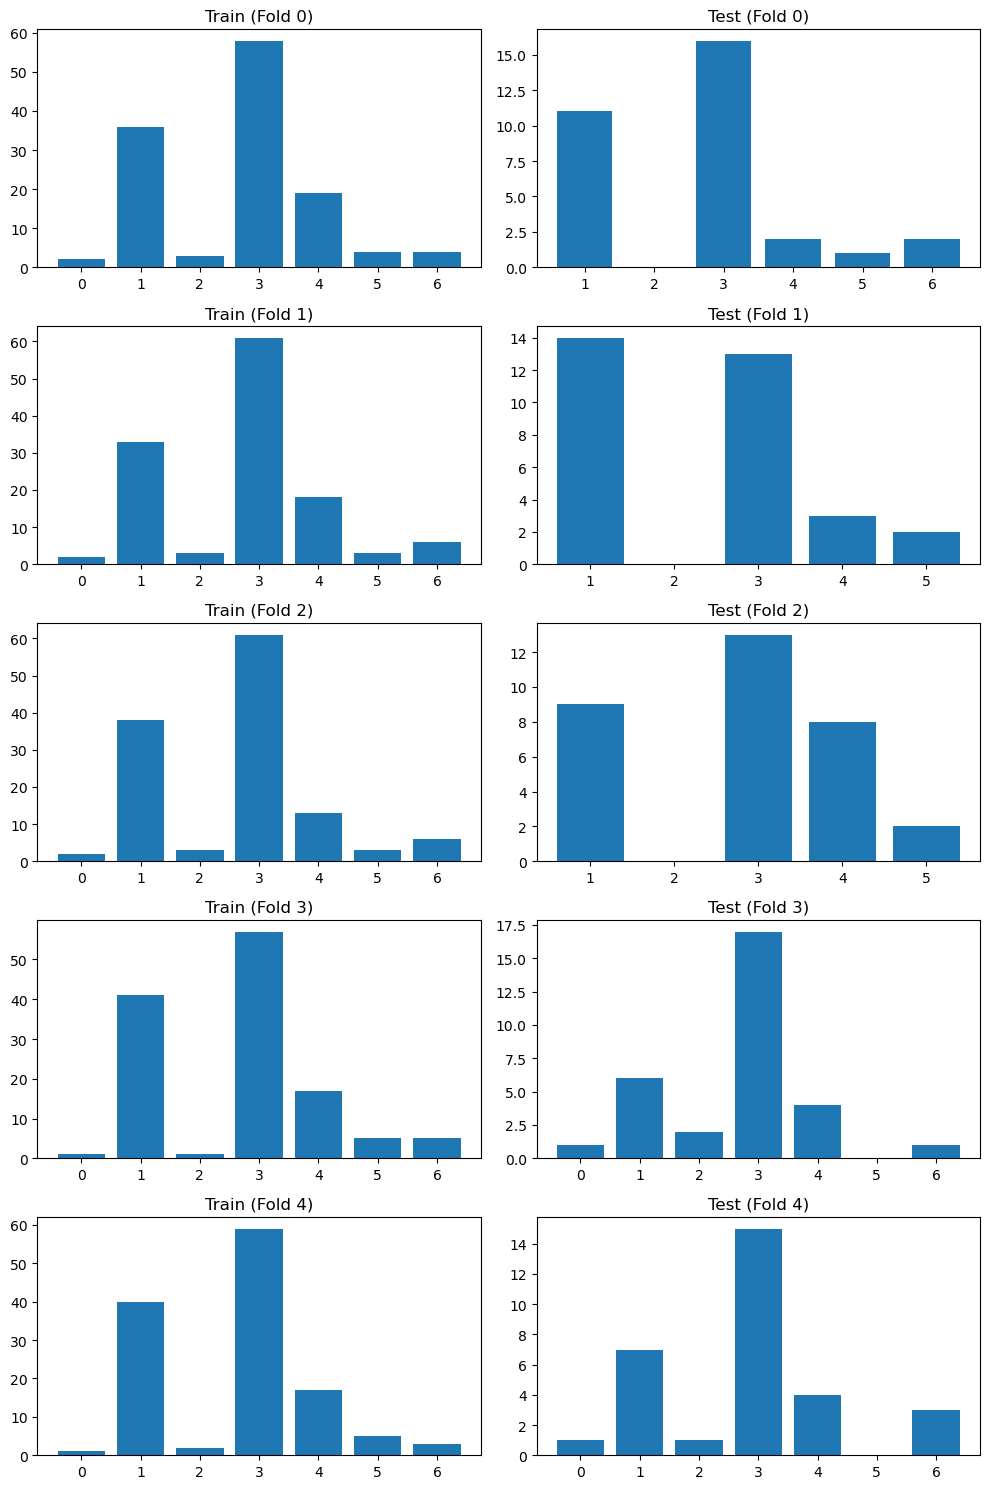

In [136]:
counts = site_counts

fig, axes = plt.subplots(5, 2, figsize=(10, 15))  # 5 rows, 2 columns
# axes = axes.flatten()

for fold in range(5):
    x = counts[fold]['train'].keys()
    y = counts[fold]['train'].values()
    axes[fold, 0].bar(x, y)
    axes[fold, 0].set_title(f'Train (Fold {fold})')

    x = counts[fold]['test'].keys()
    y = counts[fold]['test'].values()
    axes[fold, 1].bar(x, y)
    axes[fold, 1].set_title(f'Test (Fold {fold})')

plt.tight_layout()
plt.show()
